<a href="https://colab.research.google.com/github/PARULCHUTANIPC/parul/blob/p1/fmnist_d5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms
torch.set_printoptions(linewidth= 120)
torch.set_grad_enabled(True)
from torch.utils.tensorboard import SummaryWriter

In [0]:

def get_num_correct(preds, labels):
  return preds.argmax(dim=1).eq(labels).sum().item()

In [0]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # implement the forward pass
        # 1) Input layer
        t=t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # 6) Output Layer
        t = self.out(t)
#t = F.softmax(t, dim=1)

        return t

In [0]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

# TRAINING WITH A SINGLE BATCH

In [0]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set
   ,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr = 0.01)
# Obtain the batch 
batch = next(iter(train_loader))
images, labels = batch
# PASS THE BATCH IN THE NETWORK  --------  network is the name of the class we made..... in which we defined the layers, 1 input, 2 conv, 2 linear and 1 output layer
preds = network(images)
#CALCULATE LOSS
loss = F.cross_entropy(preds, labels)
# CALCULATE GRADIENTS
loss.backward()
# UPDATE WEIGHTS
optimizer.step()

In [110]:
print ('loss1 : ', loss.item()) # it will give the loss when the images are given to the network  first time
# Now, the images are again passed to the network and calculate the loss again and compare
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2 : ', loss.item())

loss1 :  2.2943737506866455
loss2 :  2.2633938789367676


**# TRAINING WITH ALL BATCHES / ONE EPOCH**

In [0]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set
   ,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr = 0.01)
# THIS IS THE SAME AS TRAINING A SINGLE BATCH. IN ADDITION TO THAT , WE HAVE TO APPLY A LOOP SO THAT ALL BATCHES CAN PASS THROUGH THE NETWORK TO GET TRAINED
#####---------------------------
total_loss= 0
total_correct = 0
# Obtain the batch 
#batch = next(iter(train_loader))
#images, labels = batch
# SELECTING ALL BATCHES
for batch in train_loader:
# PASS THE BATCH IN THE NETWORK  --------  network is the name of the class we made..... in which we defined the layers, 1 input, 2 conv, 2 linear and 1 output layer
  preds = network(images)
#CALCULATE LOSS
  loss = F.cross_entropy(preds, labels)
# -------------------- EXTRA LINE ---- SET THE INITIAL GRADIENT ZERO AFTER EVERY ITERATION, OTHERWISE IT WILL ADD UP THE WEIGHT AFTER EVERY STEP WHICH WILL ULTIMATELY RESULT IN BAD ACCURACY, HIGHER LOSS
  optimizer.zero_grad()
# CALCULATE GRADIENTS
  loss.backward()
# UPDATE WEIGHTS  
  optimizer.step()
  ##----------- Now, add the loss calculated  and the correct predictions done for every batches
  total_correct+= get_num_correct(preds, labels)
  total_loss+= loss.item()

In [112]:
print("epoch : ", 0, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
accuracy = total_correct/len(train_set)
print ("Accuracy : ", accuracy)

epoch :  0 Correct Predictions :  58699    Total_Loss :  34.20452171876968
Accuracy :  0.9783166666666666


# TRAIN THE IMAGES MULTIPLE TIMES / multiple epochs

In [113]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set
   ,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr = 0.01)
# Obtain the batch 
batch = next(iter(train_loader))
images, labels = batch
'''
################ ADDING THE TENSORBOARD  ########&&&&&&&&&&&&&&&&&&&&&
grid = torchvision.utils.make_grid(images)
tb= SummaryWriter()
tb.add_image('images', grid)
tb.add_graph(network, images)
'''
######################            CREATE A LOOOPPPPPPP ##########################################
for epoch in range(3):
# THIS IS THE SAME AS TRAINING A SINGLE BATCH. EXCEPT TO THAT , WE HAVE TO APPLY A LOOP SO THAT ALL BATCHES CAN PASS THROUGH THE NETWORK TO GET TRAINED
#####---------------------------
  total_loss= 0
  total_correct = 0
# SELECTING ALL BATCHES
  for batch in train_loader:
# PASS THE BATCH IN THE NETWORK  --------  network is the name of the class we made..... in which we defined the layers, 1 input, 2 conv, 2 linear and 1 output layer
    preds = network(images)
#CALCULATE LOSS
    loss = F.cross_entropy(preds, labels)
# -------------------- EXTRA LINE ---- SET THE INITIAL GRADIENT ZERO AFTER EVERY ITERATION, OTHERWISE IT WILL ADD UP THE WEIGHT AFTER EVERY STEP WHICH WILL ULTIMATELY RESULT IN BAD ACCURACY, HIGHER LOSS
    optimizer.zero_grad()
# CALCULATE GRADIENTS
    loss.backward()
# UPDATE WEIGHTS  
    optimizer.step()
  ##----------- Now, add the loss calculated  and the correct predictions done for every batches
    total_correct+= get_num_correct(preds, labels)
    total_loss+= loss.item()
'''
###-------------------ADDING THE TENSORBOARD--------------------------------
  tb.add_scalar('Loss', total_loss, epoch)
  tb.add_scalar('Correct Predictions', total_correct, epoch)
  tb.add_scalar('Accuracy', total_correct/len(train_set), epoch)
  tb.add_histogram('Conv1.bias', network.conv1.bias, epoch)
  tb.add_histogram('Conv1.weight', network.conv1.weight, epoch)
  tb.add_histogram('Conv1.weight.grad', network.conv1.weight.grad, epoch)

'''
print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
#tb.close()

epoch :  2 Correct Predictions :  60000    Total_Loss :  0.004823391249374254


In [114]:
#print("epoch : ", epoch, "Correct Predictions : ", total_correct, "   Total_Loss : ", total_loss)
accuracy = total_correct/len(train_set)
print ("Accuracy : ", accuracy*100,"%")

Accuracy :  100.0 %


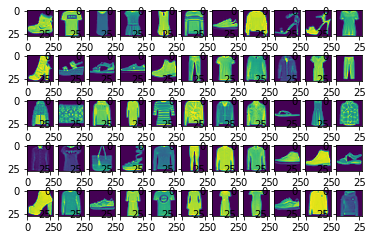

In [115]:
#plt.(20,20)
import matplotlib.pyplot as plt
for i in range(55):
    plt.subplot(5,11,i+1)
    plt.imshow(images[i].squeeze())
plt.show()

#ANALYZING CNN RESULTS / CONFUSION MATRIX

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
#from resources.plotcm import plot_confusion_matrix

In [116]:
# collecting maximum values from a batch
#-----------------------------------------------------------
try1 = []
for u in preds:
  try1.append(u.argmax(dim=0).tolist())
len(try1)

100

In [118]:
# COLLECTING ALL PREDICTED VALUES ------------BATCHWISE
try1 = []
for batch in train_loader:
  for u in preds:
    try1.append(u.argmax(dim=0).tolist())
len(try1)

60000

In [119]:
# COLLECTING ALL LABELLED VALUES ------------BATCHWISE
try2 = []
for batch in train_loader:
  for uu in labels:
    try2.append(uu.tolist())
len(try2)

60000

In [120]:
cm = confusion_matrix(try2, try1)
#print(type(cm))
#cm.dtype
cm

array([[7200,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6600,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 5400,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 9000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 5400,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 6600,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 6000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 4800,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 2400,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 6600]])

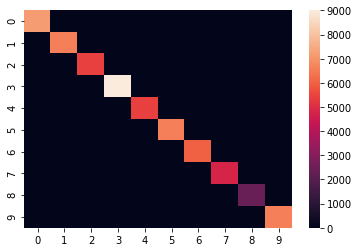

In [121]:
sns.heatmap(data = cm)

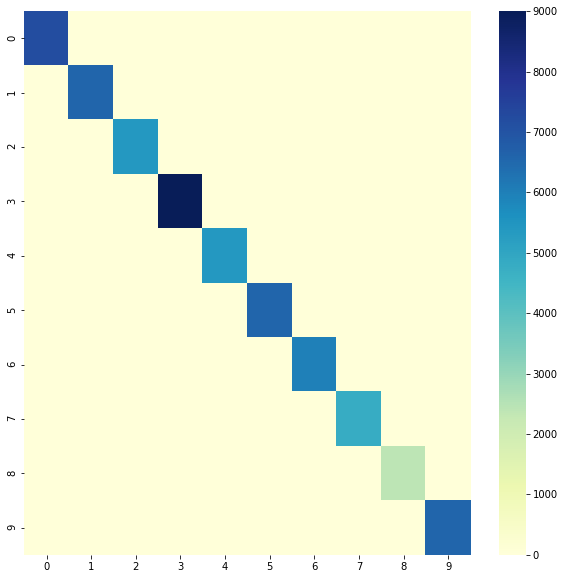

In [124]:
 names = (
    'T-shirt/top'
    ,'Trouser'
    ,'Pullover'
    ,'Dress'
    ,'Coat'
    ,'Sandal'
    ,'Shirt'
    ,'Sneaker'
    ,'Bag'
    ,'Ankle boot'
)
plt.figure(figsize=(10,10))
#plt.plot(data = cm)
sns.heatmap(cm, cmap ="YlGnBu")
#plot_confusion_matrix(datacm, names)

In [0]:
from sklearn.metrics import classification_report

In [122]:
print(classification_report(try1, try2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7200
           1       1.00      1.00      1.00      6600
           2       1.00      1.00      1.00      5400
           3       1.00      1.00      1.00      9000
           4       1.00      1.00      1.00      5400
           5       1.00      1.00      1.00      6600
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      4800
           8       1.00      1.00      1.00      2400
           9       1.00      1.00      1.00      6600

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



In [125]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**WORKING ON TEST DATA**

In [0]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

test_dataset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100,
                                        shuffle=False)

In [126]:
#   help code to load test data
'''
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

SyntaxError: ignored

In [130]:
print('Finished Training')
PATH = '/content/drive/My Drive/Colab Notebooks/DATASETS/fashion-mnist_test.csv'
torch.save(network.state_dict(), PATH)

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images_test, labels_test in test_loader:
        #images = images.to(device)
        #labels = labels.to(device)
        outputs_test = network(images_test)
        # max returns (value ,index)
        _, predicted = torch.max(outputs_test, 1)
        n_samples += labels_test.size(0)
        n_correct += (predicted == labels_test).sum().item()
'''
        for i in range(100):
            labels_test = labels_test[i]
            pred_test = predicted[i]
            if (labels_test == pred_test):
                n_class_correct[labels_test] += 1
            n_class_samples[labels_test] += 1
'''
acc = 100.0 * n_correct / n_samples
print(f'Accuracy of the network: {acc} %')
'''
for i in range(10):
  acc = 100.0 * n_class_correct[i] / n_class_samples[i]
  print(f'Accuracy of {classes[i]}: {acc} %')'''

Finished Training
ERROR! Session/line number was not unique in database. History logging moved to new session 67
Accuracy of the network: 9.93 %


"\nfor i in range(10):\n  acc = 100.0 * n_class_correct[i] / n_class_samples[i]\n  print(f'Accuracy of {classes[i]}: {acc} %')"

In [128]:
print('Finished Training')
PATH = '/content/drive/My Drive/Colab Notebooks/DATASETS/fashion-mnist_test.csv'
torch.save(network.state_dict(), PATH)

with torch.no_grad():
  network = Network()
  test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100)
  batch_test = next(iter(test_loader))
  images_test, labels_test = batch_test

  total_loss_test= 0
  total_correct_test = 0

# SELECTING ALL BATCHES
  for batch_test in test_loader:
    preds_test = network(images_test)

#CALCULATE LOSS
    loss_test = F.cross_entropy(preds_test, labels_test)
    total_correct_test+= get_num_correct_test(preds_test, labels_test)
    total_loss_test+= loss_test.item()

  print("Correct Predictions in Test Data : ", total_correct_test, "   Total_Loss : ", total_loss_test)


Finished Training
Correct Predictions in Test Data :  700    Total_Loss :  231.5505027770996


In [129]:
labels_test

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9, 1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7,
        5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1, 2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 3, 9, 8, 7, 0, 2, 6,
        2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8, 0, 1, 4, 2])

In [0]:
def get_num_correct_test(preds_test, labels_test):
  return preds_test.argmax(dim=1).eq(labels_test).sum().item()

In [0]:
total_correct_test+= get_num_correct(preds_test, labels_test)
total_loss_test+= loss_test.item()

In [0]:
print("Correct Predictions : ", total_correct_test, "   Total_Loss : ", total_loss_test)
accuracy_test = total_correct_test/len(test_dataset)
print ("Accuracy : ", accuracy_test)

In [0]:
# COLLECTING ALL LABELLED VALUES of test data ------------BATCHWISE
try4 = []
for batch in test_loader:
  for uu in labels_test:
    try4.append(uu.tolist())
len(try4)

In [0]:
# COLLECTING ALL predicted VALUES of test data ------------BATCHWISE
try3 = []
for batch in test_loader:
  for u in predicted:
    try3.append(u.argmax(dim=0).tolist())
len(try3)

In [0]:
cm_test = confusion_matrix(try4, try3)

In [0]:
cm_test

In [0]:
print(classification_report(try3, try4))